# Creating a Simple Interactive Map

## Simple Web Maps

Simple interactive web maps in Python are often made with a library called `folium`. These are not maps in the GIS sense because they can _only_ be viewed in a web browser, and sometimes even then only after disabling safety precautions in the browser itself (see notes at the end of this notebook). But in a Jupyter notebook context, `folium` works really well because it's just embedding more web content into a running web page. Simples!

As always, if you get stuck you may want to RTM: [Latest folium documentation](https://media.readthedocs.org/pdf/folium/latest/folium.pdf).

### Getting started

The mapping that we'll do this week is covered by just three libraries. But please make sure that you the latest version of folium installed (0.2.1 as of the time I'm writing this practical). If not, you'll have to go back to the video from Week 5 of Geocomp that shows you how to install libraries from the **Terminal**.

Here's a hint:
```shell
source activate spats
conda install folium
```

However, note that this will _not_ work 'as is' and that you'll have to work out how to install a package from a 'channel' by reading the output of each 'failed' step; it should take you three steps in all, but conda will help you with each one by providing a useful explanation of what needs doing next.

When `conda` has successfully installed folium you can deactivate the `spats` environment again:
```shell
source deactivate spats
```

In [1]:
import folium  
import pandas as pd
import os

print (folium.__version__)

%matplotlib inline

0.2.1


### Creating a map with coordinate ‘popup’

The latitude and longitude of Birmingham is (roughly): 52.4381°N and 1.8936°W. Replace the `???` below so that the map you create will be centred on Birmingham. 

*Hint: If you need help to figure out the format try using `help(folium.Map)` or searching online via Google.*

In [2]:
MAP_COORDINATES = (52.4782, -1.8993) # ???

In [3]:
m = folium.Map(location=MAP_COORDINATES, zoom_start=11) # Create the map
m.add_children(folium.LatLngPopup()) # Add the popup functionality
m # And now show the map

You should see a map centred on the city of Birmingham. **If you see a map centred somewhere off of the East coast of the UK then you need to think about what 1.8936°W means in terms of x and y coordinates on a graph.**

Try clicking somewhere on the map, what happens?

Now, copying the code above into the cell below, try changing the map style to one of the other types (e.g. the 'Stamen Toner' style) and seeing what happens... You have to specify the 'tiles' type when you first create the map object. Lots of examples [here](http://folium.readthedocs.io/en/latest/quickstart.html).

In [4]:
m = folium.Map(location=MAP_COORDINATES, zoom_start=11, tiles="Stamen Toner") # Create the map
m.add_children(folium.LatLngPopup()) # Add the popup functionality
m # And now show the map

### Adding a Marker

Drag the map crated above until it is centred on Central London. Now click on the Strand Campus and make a note of the coordinates in the popup (they should be in the vicinity of 51.5º latitude and -0.1º longitude). We want to set this as the new map centre by creating a new variable containing the coordinates below:

In [5]:
MAP_COORDINATES = (51.5113, -0.1160) # ???

We want to add a marker showing where the Geography Department is on our map. We also want to try changing the zoom level so that you can see the outline of the Strand Campus and the immediate vicinity:

In [6]:
m = folium.Map(location=MAP_COORDINATES, zoom_start=18) # ???
m.add_children(folium.LatLngPopup())
# And now add a marker
folium.Marker(MAP_COORDINATES, # ???
              popup='Geography'
             ).add_to(m)
m # Print the map

Always remember that you can find out more about a method by typing `help(function)`. So in this case: `help(folium.Marker)`.

### Adding More Markers

Now add the rest of the main King’s buildings on the North side of the Thames (Virginia Woolf, Bush House, Maughan Library and Somerset House East Wing) to this map using [a few different marker styles](http://fontawesome.io/icons/)! *Note:* not all of these icons worked when I tested this, but many do.

As a hint, you'll need to use the `icon` parameter in your code. To see how this works you might want to `Insert` -> `Cell Below` so that you can type `help(folium.Icon)` and view the output, and you can also look at some examples at [read the docs](http://folium.readthedocs.io/en/latest/quickstart.html).

Now, can you think how you might use a `for` loop and a data structure (a list, dictionary, or hybrid like a dictionary of lists) to make the process of adding the markers less tedious?

In [7]:
locs = {
    'Strand Campus':  {'lat': 51.5113, 'lon': -0.1160, 'icon': 'plane'},
    'Virginia Woolf': {'lat': 51.5147, 'lon': -0.1180, 'icon': 'shopping-cart'},
    'Maughan Library': {'lat': 51.5153, 'lon': -0.1104, 'icon': 'cog'},
    'Somerset House': {'lat': 51.5127, 'lon': -0.1172, 'icon': 'cloud'},
    'Bush House': {'lat': 51.5112, 'lon': -0.1166, 'icon': 'info-sign'}
}

m = folium.Map(location=MAP_COORDINATES, zoom_start=15)

for l, v in locs.iteritems(): # ???
    # And now add a marker
    folium.Marker( (v['lat'], v['lon']), icon=folium.Icon(color='green', icon=v['icon']), 
              popup=l
             ).add_to(m)
m # Print the map

## Using GeoJSON files

OK, so that was fairly straightforward: 
1. Pick a lat/long location for the centre of the map.
2. Pick a zoom level
3. Add some popup info
4. Show map

But what about if we want to overlay some actual data? Folium will also let you load the JSON data file available from https://raw.githubusercontent.com/datasets/geo-boundaries-world-110m/master/countries.geojson in your map! (_Note:_ to find out more about this file have a look at: http://data.okfn.org/data/datasets/geo-boundaries-world-110m.)

Drawing on the work you did above and on the work that you did in Term 1 using JSON at the MetOffice API, how would you _request_ the JSON file from GitHub? 

In [8]:
import requests
jsonURL = 'https://raw.githubusercontent.com/datasets/geo-boundaries-world-110m/master/countries.geojson' # ???
r = requests.get(jsonURL) # ???
print("Done")

Done


What we are doing now is creating a choropleth map, so perhaps you'd like to take a look at the `help` (or search Google for `Folium choropleth`)? If you search online you will need to make sure that you are looking at the documentation for how to show a choropleth for version 0.2 or higher since version 0.1 used a very different approach...

Set at an appropriate zoom level, and set the options so that there is no fill colour, and the outline colour is red.

In [9]:
help(folium.Map.choropleth)

Help on method choropleth in module folium.folium:

choropleth(self, geo_path=None, geo_str=None, data_out='data.json', data=None, columns=None, key_on=None, threshold_scale=None, fill_color='blue', fill_opacity=0.6, line_color='black', line_weight=1, line_opacity=1, legend_name='', topojson=None, reset=False) unbound folium.folium.Map method
    Apply a GeoJSON overlay to the map.
    
    Plot a GeoJSON overlay on the base map. There is no requirement
    to bind data (passing just a GeoJSON plots a single-color overlay),
    but there is a data binding option to map your columnar data to
    different feature objects with a color scale.
    
    If data is passed as a Pandas dataframe, the "columns" and "key-on"
    keywords must be included, the first to indicate which DataFrame
    columns to use, the second to indicate the layer in the GeoJSON
    on which to key the data. The 'columns' keyword does not need to be
    passed for a Pandas series.
    
    Colors are generated from

In [10]:
m = folium.Map(location=MAP_COORDINATES, zoom_start=2)
m.choropleth (
    geo_str=r.json(), # ???
    fill_color=None, line_color='red', fill_opacity=0.0, line_opacity=0.25, line_weight=2)
m # And show the map

You should see an outline with simplified borders -- this is a common 'problem' in geodata: if they were to provide us with high-resolution data then the JSON file would be much, much larger (Gigabytes, instead of Kilobytes). Remember this downsampling 'trick' when working with geodata!

### A Few Questions about the JSON file

1. What _properties_ are there for each country in the GeoJSON file? (There's a clue in the question)

I'll give some code to help you skip over the most tedious stuff...

In [12]:
def getCountry(json, cntry=0):
    return json['features'][cntry]
    
print(getCountry(r.json()))

{u'geometry': {u'type': u'Polygon', u'coordinates': [[[61.210817091725744, 35.650072333309225], [62.230651483005886, 35.270663967422294], [62.98466230657661, 35.40404083916762], [63.19353844590035, 35.857165635718914], [63.98289594915871, 36.0079574651466], [64.5464791197339, 36.31207326918427], [64.7461051776774, 37.111817735333304], [65.58894778835784, 37.30521678318564], [65.74563073106683, 37.66116404881207], [66.21738488145934, 37.39379018813392], [66.51860680528867, 37.36278432875879], [67.07578209825962, 37.35614390720929], [67.82999962755952, 37.144994004864685], [68.13556237170138, 37.02311513930431], [68.85944583524594, 37.344335842430596], [69.19627282092438, 37.15114350030743], [69.51878543485796, 37.60899669041342], [70.11657840361033, 37.58822276463209], [70.27057417184014, 37.735164699854025], [70.3763041523093, 38.13839590102752], [70.80682050973289, 38.486281643216415], [71.34813113799026, 38.25890534113216], [71.23940392444817, 37.953265082341886], [71.54191775908478,

And now, using what you've understood from the previous code:
2. What country has index 20? 
3. How would you change the code to print only that country's abbreviated name?
4. How about it's ISO-3 abbreviation?

In [18]:
print("Abbreviated Name: " + getCountry(r.json(), 20)['properties']['abbrev'])
print("ISO-3 Name: " + getCountry(r.json(), 20)['properties']['iso_a3'])

Abbreviated Name: Belize
ISO-3 Name: BLZ


## Joining Data to Folium Maps

So now we've been able to add a world map on top of Folium, but that's not _hugely_ useful unless we can also link it to some data... 

### Loading World Population Data

Helpfully, the World Bank publishes a lot of data about countries here: http://data.worldbank.org/indicator/SP.POP.TOTL. Click on the 'Download' link and save the CSV file to the _data_ directory for the Spatial Analysis module (it will be a directory called 'data' one level _lower_ than _this_ Notebook).

Here's a really useful trick for reading a CSV file out of a Zip archive that contains multiple files!

In [42]:
# Import library to read Zip files
import zipfile 

# Load the Zip file
z = zipfile.ZipFile(os.path.join('data','API_SP.POP.TOTL_DS2_en_csv_v2.zip'))

# Show what files are contained inside
print(z.namelist())

['Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2.csv', 'API_SP.POP.TOTL_DS2_en_csv_v2.csv', 'Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2.csv']


Make sure you understand what's happening above. Add comments!

When you want to read the CSV file from the Zip archive then you use `z.open(<filename>)`. So, you will need to pass `z.open...` to pandas' `read_csv` command and _then_ specify _both_ `skiprows` and `header` in order to parse the file properly -- while you try to work out what to do you might wants to unzip a copy of this file so that you can view the file directly (but you can then delete it once you've made sense of the headers so that it takes up less space).

Although this process might seem a little convoluted compared to just unzipping the file and reading the CSV file directly into pandas, let's take note of what this allows us to do: we no longer need to extract files from archives in order to read them; we can save a lot of disk space (since tabular data tends to compress well); and we can now do this for _any_ Zip archive, including those that contain multiple files inside!

In [75]:
# Read in the CSV file extracted from the 
# Zip archive in the previous code block
df = pd.read_csv(z.open('API_SP.POP.TOTL_DS2_en_csv_v2.csv'), skiprows=[0], header=1)

# Drop unneeded columns from the data frame
df.drop(['Unnamed: 61','2016','Indicator Code','Indicator Name'], inplace=True, axis=1)

# Change the names of the first two columns so that 
# they don't have spaces in them any more...
new_cols = df.columns.values.tolist()
new_cols[0] = 'Name'
new_cols[1] = 'Code'
df.columns = new_cols

# Check it worked
df.head(3)

,Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,54208.0,55435.0,56226.0,56697.0,57029.0,57360.0,57712.0,58049.0,...,100830.0,101218.0,101342.0,101416.0,101597.0,101936.0,102393.0,102921.0,103441.0,103889.0
1,Andorra,AND,13414.0,14376.0,15376.0,16410.0,17470.0,18551.0,19646.0,20755.0,...,83373.0,84878.0,85616.0,85474.0,84419.0,82326.0,79316.0,75902.0,72786.0,70473.0
2,Afghanistan,AFG,8994793.0,9164945.0,9343772.0,9531555.0,9728645.0,9935358.0,10148841.0,10368600.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0


In [86]:
# This sets it for all summaries
pd.set_option('display.float_format', lambda x: '{:,.0f}'.format(x))

# Summarise
df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,260,260,260,260,260,260,260,260,260,260,...,263,263,263,263,263,263,262,262,262,262
mean,"118,408,931","119,994,957","122,112,045","124,739,290","127,392,951","130,107,994","132,966,626","135,818,252","138,722,088","141,769,748",...,"263,977,537","267,390,621","270,857,358","274,354,432","277,872,787","281,429,886","286,049,963","289,758,505","293,422,310","297,131,652"
std,"372,944,577","377,396,254","383,935,789","392,439,931","401,004,538","409,791,910","419,142,476","428,441,059","437,949,562","447,944,546",...,"839,827,526","850,075,228","860,446,010","870,923,097","881,471,322","892,140,255","904,430,119","915,442,171","926,438,253","937,504,803"
min,"4,279","4,453","4,566","4,656","4,748","4,841","4,936","5,033","5,161","5,303",...,"9,732","9,764","9,788","9,808","9,827","9,844","9,860","9,876","9,893","9,916"
25%,"517,903","529,510","541,854","554,971","568,171","572,487","578,296","589,936","629,000","655,008",...,"1,324,976","1,324,970","1,363,026","1,420,972","1,436,706","1,456,044","1,409,556","1,424,658","1,443,366","1,464,251"
50%,"3,669,526","3,734,208","3,811,270","3,901,628","4,020,265","4,145,164","4,235,566","4,300,506","4,367,332","4,449,020",...,"8,484,550","8,815,495","9,132,589","9,298,515","9,490,000","9,779,391","9,976,996","10,080,620","10,133,765","10,096,667"
75%,"25,327,536","26,115,409","26,905,081","27,700,503","28,478,836","29,246,751","29,991,907","30,595,026","31,202,390","31,795,274",...,"49,363,752","49,648,233","50,163,114","50,695,322","51,252,420","51,837,684","52,496,976","53,140,119","53,903,275","54,691,978"
max,"3,035,055,570","3,076,120,548","3,129,063,789","3,193,947,306","3,259,354,557","3,326,054,230","3,395,866,317","3,465,297,420","3,535,511,844","3,609,910,116",...,"6,594,722,462","6,675,832,678","6,758,302,523","6,840,955,706","6,923,684,085","7,006,907,989","7,089,451,551","7,176,092,192","7,260,780,278","7,346,633,037"


### Binning the Data

I can tell simply from looking at the summary above that we're dealing with a pretty massively skewed data set... how can I tell that? What are the clues?

Let's check that by making a plot of the data from 1960:

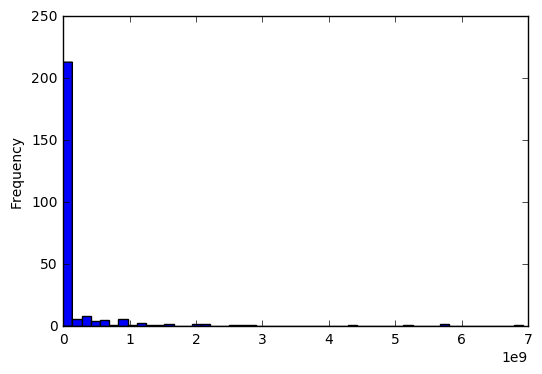

In [211]:
df['2010'].plot.hist(bins=50)

When dealing with data like this, it _might_ be more useful to work with quantiles or rank. Why is that? What do those two approaches allow us to do when making a map?

### Rank

Let's start with rank. We want the population rank in 1960 as our legend for the map so let's calculate that first. This is so straightforward that I'm not going to help you: you can just search online for help to do with series rank.

In [212]:
df['r2010'] = df['2010'].rank(ascending=False)

### Quantiles

Do you remember how to get a list of quantiles from a pandas data frame? No? Well you’ll have to go look at your old Geocomputation code (or use `help(<data frame>.<column name>.quantile)`)! Let’s get the following quantiles: 0th, 20th, 40th, 60th, 80th, and 100th for 2010.

*Hint*: you should get the following numbers... 9,827; 651,135; 5,306,028; 16,297,908; 99,941,841; 6,923,684,085. 

Let's calculate these first and then figure out how to create a quantiles column:

In [213]:
quantiles = df['2010'].quantile([0.0, 0.2, 0.4, 0.6, 0.8, 1.0]).values.tolist() # ???
for q in quantiles:
    print("Quantile: " + '{:,.0f}'.format(q))

Quantile: 9,827
Quantile: 651,135
Quantile: 5,306,028
Quantile: 16,297,908
Quantile: 99,941,841
Quantile: 6,923,684,085


In [215]:
df['q2010'] = pd.cut(df['2010'], bins=quantiles, labels=['Quantile ' + str(x) for x in range(1, len(quantiles))])

In [216]:
df[['Name','Code','2010','r2010','q2010']].head(5)

,Name,Code,2010,r2010,q2010
0,Aruba,ABW,"101,597",239,Quantile 1
1,Andorra,AND,"84,419",242,Quantile 1
2,Afghanistan,AFG,"27,962,207",88,Quantile 4
3,Angola,AGO,"21,219,954",96,Quantile 4
4,Albania,ALB,"2,913,021",183,Quantile 2


In [245]:
df[(df.r2010 <= 17) & (df.r2010 > 7)][['Name','Code','2010','r2010','q2010']]

,Name,Code,2010,r2010,q2010
38,China,CHN,"1,337,705,000",16,Quantile 5
58,East Asia & Pacific (excluding high income),EAP,"1,963,842,316",11,Quantile 5
60,East Asia & Pacific,EAS,"2,204,613,382",9,Quantile 5
101,IDA total,IDA,"1,488,132,685",15,Quantile 5
140,Late-demographic dividend,LTE,"2,182,060,690",10,Quantile 5
179,OECD members,OED,"1,243,550,244",17,Quantile 5
201,South Asia,SAS,"1,628,688,562",14,Quantile 5
227,East Asia & Pacific (IDA & IBRD countries),TEA,"1,939,296,199",12,Quantile 5
237,South Asia (IDA & IBRD),TSA,"1,628,688,562",14,Quantile 5
246,Upper middle income,UMC,"2,493,277,491",8,Quantile 5


In [219]:
# We need to find all of the keys that are
# *in* the GeoJSON file but are 'missing'
# from the pandas data frame. The best way
# to do this is to extract a list from the 
# JSON file and then compare it the codes.
def getCountryCode(f):
    return f['properties']['iso_a3']

my_json_codes = []
for c in r.json()['features']:
    my_json_codes.append(getCountryCode(c))
    
my_df_codes = df.Code.values.tolist()

In [147]:
# You can use this block to see what 
# these new lists contain...

[u'AFG', u'AGO', u'ALB', u'ARE', u'ARG', u'ARM', u'ATA', u'ATF', u'AUS', u'AUT', u'AZE', u'BDI', u'BEL', u'BEN', u'BFA', u'BGD', u'BGR', u'BHS', u'BIH', u'BLR', u'BLZ', u'BOL', u'BRA', u'BRN', u'BTN', u'BWA', u'CAF', u'CAN', u'CHE', u'CHL', u'CHN', u'CIV', u'CMR', u'COD', u'COG', u'COL', u'CRI', u'CUB', u'-99', u'CYP', u'CZE', u'DEU', u'DJI', u'DNK', u'DOM', u'DZA', u'ECU', u'EGY', u'ERI', u'ESP', u'EST', u'ETH', u'FIN', u'FJI', u'FLK', u'FRA', u'GAB', u'GBR', u'GEO', u'GHA', u'GIN', u'GMB', u'GNB', u'GNQ', u'GRC', u'GRL', u'GTM', u'GUY', u'HND', u'HRV', u'HTI', u'HUN', u'IDN', u'IND', u'IRL', u'IRN', u'IRQ', u'ISL', u'ISR', u'ITA', u'JAM', u'JOR', u'JPN', u'KAZ', u'KEN', u'KGZ', u'KHM', u'KOR', u'-99', u'KWT', u'LAO', u'LBN', u'LBR', u'LBY', u'LKA', u'LSO', u'LTU', u'LUX', u'LVA', u'MAR', u'MDA', u'MDG', u'MEX', u'MKD', u'MLI', u'MMR', u'MNE', u'MNG', u'MOZ', u'MRT', u'MWI', u'MYS', u'NAM', u'NCL', u'NER', u'NGA', u'NIC', u'NLD', u'NOR', u'NPL', u'NZL', u'OMN', u'PAK', u'PAN', u'PER',

In [220]:
# Convert the lists to sets...
js = set(my_json_codes)
ds = set(my_df_codes)

In [221]:
# And find out what's in the JSON
# file that is *not* in the data frame
missing = js.difference(ds)
print("Missing rows from data frame: " + ", ".join(missing))
print(type(missing))

Missing rows from data frame: -99, ATF, ATA, TWN, FLK, ESH
<type 'set'>


In [222]:
d = {'Name': list(missing), 'Code': list(missing)}
dfm = pd.DataFrame.from_dict(d)
dfm

,Code,Name
0,-99,-99
1,ATF,ATF
2,ATA,ATA
3,TWN,TWN
4,FLK,FLK
5,ESH,ESH


In [224]:
dfn = df.append(dfm, ignore_index=True)
dfn[dfn.Code.isin(['ATF','TWN','WLD'])][['1960','1980','2000','2010','Code']]
dfn.tail(10)[['Name','Code','2010']]

,Name,Code,2010
260,South Africa,ZAF,"50,771,826"
261,"Congo, Dem. Rep.",COD,"65,938,712"
262,Zambia,ZMB,"13,917,439"
263,Zimbabwe,ZWE,"13,973,897"
264,-99,-99,nan
265,ATF,ATF,nan
266,ATA,ATA,nan
267,TWN,TWN,nan
268,FLK,FLK,nan
269,ESH,ESH,nan


In [225]:
# And remove the extra rows from 
# the data frame since it will mess
# up the scale for the things it can't
# show...
extraneous = ds.difference(js)
print(sorted(list(extraneous)))

['ABW', 'AND', 'ARB', 'ASM', 'ATG', 'BHR', 'BMU', 'BRB', 'CEB', 'CHI', 'COM', 'CPV', 'CSS', 'CUW', 'CYM', 'DMA', 'EAP', 'EAR', 'EAS', 'ECA', 'ECS', 'EMU', 'EUU', 'FCS', 'FRO', 'FSM', 'GIB', 'GRD', 'GUM', 'HIC', 'HKG', 'HPC', 'IBD', 'IBT', 'IDA', 'IDB', 'IDX', 'IMN', 'INX', 'KIR', 'KNA', 'KSV', 'LAC', 'LCA', 'LCN', 'LDC', 'LIC', 'LIE', 'LMC', 'LMY', 'LTE', 'MAC', 'MAF', 'MCO', 'MDV', 'MEA', 'MHL', 'MIC', 'MLT', 'MNA', 'MNP', 'MUS', 'NAC', 'NRU', 'OED', 'OSS', 'PLW', 'PRE', 'PSS', 'PST', 'PYF', 'SAS', 'SGP', 'SMR', 'SSA', 'SSF', 'SST', 'STP', 'SXM', 'SYC', 'TCA', 'TEA', 'TEC', 'TLA', 'TMN', 'TON', 'TSA', 'TSS', 'TUV', 'UMC', 'VCT', 'VGB', 'VIR', 'WLD', 'WSM']


In [232]:
# And delete using the index labels
dft = dfn.drop(df.index[dfn.Code.isin(extraneous)])

# And check it worked by looking for the 'World' data set
dft[dft.Code.isin(['ATF','TWN','WLD','CAN'])][['Code','Name','2010']]

,Code,Name,2010
33,CAN,Canada,"34,005,274"
265,ATF,ATF,nan
267,TWN,TWN,nan


In [258]:
# Rebuild the quantiles and rank
quantiles = dft['2010'].quantile([0.0, 0.2, 0.4, 0.6, 0.8, 1.0]).values.tolist() # ???
dft['q2010'] = pd.cut(dft['2010'], bins=quantiles, labels=[x for x in range(1, len(quantiles))])
for q in quantiles:
    print("Quantile: " + '{:,.0f}'.format(q))
dft.head(7)[['Name','q2010']]

Quantile: 56,905
Quantile: 2,931,457
Quantile: 6,416,263
Quantile: 14,285,648
Quantile: 36,067,649
Quantile: 1,337,705,000


,Name,q2010
2,Afghanistan,4
3,Angola,4
4,Albania,1
6,United Arab Emirates,3
7,Argentina,5
8,Armenia,2
11,Australia,4


In [260]:
m = folium.Map(location=MAP_COORDINATES, zoom_start=2)
m.choropleth (
    geo_str=r.json(),
    data=dft,
    columns=['Code','q2010'],
    key_on='feature.properties.iso_a3',
    threshold_scale=range(1, len(quantiles)),
    legend_name='2010 Population Quantiles',
    fill_color='YlGn', line_color='grey', fill_opacity=0.85, line_opacity=0.75, line_weight=1)
m

In [282]:
print(dft.r2010.min())
print(dft.r2010.max())
my_scale = range(int(dft.r2010.min()), int(dft.r2010.max()), 50)
print(my_scale)

16.0
246.0
[16, 66, 116, 166, 216]


In [283]:
m = folium.Map(location=MAP_COORDINATES, zoom_start=2)
m.choropleth (
    geo_str=r.json(),
    data=dft,
    columns=['Code','r2010'],
    key_on='feature.properties.iso_a3',
    threshold_scale=my_scale,
    legend_name='2010 Population Rank',
    fill_color='YlGn', line_color='grey', fill_opacity=0.85, line_opacity=0.75, line_weight=1)
m

Take a minute to think about the results:
1. Why does the legend start at 14?
2. How do we get a scale that _doesn't_ emphasise the countries with small populations?
3. Is quantile or rank the best way to represent the population anyway?

## Testing Your Understanding

Let’s see how well you've understood everything so far... I want you to spend a few minutes thinking about the following question: how could you compare population changes over time given that the scales are different for each one? 

The answer to this was covered in Term 1, but perhaps now the purpose of standardisation will be a little more clear. The point is to think about how we can present population change between a time period of your choice (_e.g._ 1975-2015) on a Folium map using a scheme of your choice. 

Do this by pulling in _all_ of the code that you used above into one long code block that can be run _separately_ from all of the other code on this page. The easiest way to check that you've got it all 'right' is to click on the `Kernel` drop-down and then select `Restart`: that will clear all of the existing variables and data so that when you run the code below it won't be able to accidentally pull in any work you've already done.

### Viewing the Output _Outside_ of a Notebook

Note that for the interactive maps to work properly outside of the Jupyter Notebook environment you _may_ need to launch Google Chrome from the terminal using the following command:
* Linux Terminal: `google-chrome --disable-web-security`
* Windows: `start chrome --disable-web-security`
* Mac: `open /Applications/Google\ Chrome.app --args --disable-web-security`
This is needed to get around a security restriction (normally a good thing) in Google Chrome to do with loading content from `file://...`